#  E-commerce Sales Analysis and Forecasting Project

## Introduction
In the competitive landscape of e-commerce, understanding customer behavior is essential for personalizing marketing efforts and enhancing customer satisfaction. This project aims to segment customers based on their purchasing patterns using clustering algorithms. By analyzing an e-commerce dataset with attributes such as purchase quantity, unit price, and customer ID, we can derive meaningful insights into distinct customer groups. This segmentation helps businesses tailor strategies for customer retention, targeted marketing, and inventory management. In this analysis, we perform data preprocessing, exploratory data analysis (EDA), and implement clustering algorithms to identify and interpret customer segment

## Step 1: Import Libraries

In [ ]:
## Data Import and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

## Step 2: Load and Explore the Dataset

In [3]:
# Specify the file path to the CSV file located on the desktop
file_path = r"C:\Users\user\Desktop\ecommerce customer segmentation.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Specify encoding


# Initial data inspection
df.head()
df.info()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

## Step 3: Data Preprocessing and Cleaning

In [4]:
# Clean missing CustomerID values
df.dropna(subset=['CustomerID'], inplace=True)

# Converting data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Step 4: Descriptive Analysis
### 1. Basic Overview of Sale

Total Sales:  8300065.814000001


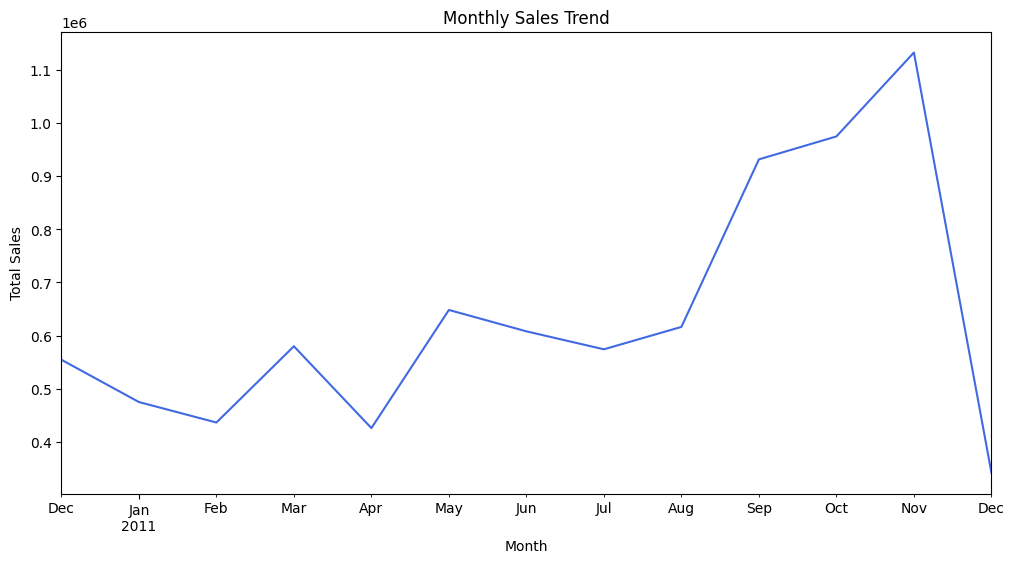

In [5]:
print("Total Sales: ", df['TotalPrice'].sum())
# Monthly sales trend
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['TotalPrice'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(title='Monthly Sales Trend', color='royalblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### 2. Top Selling Products

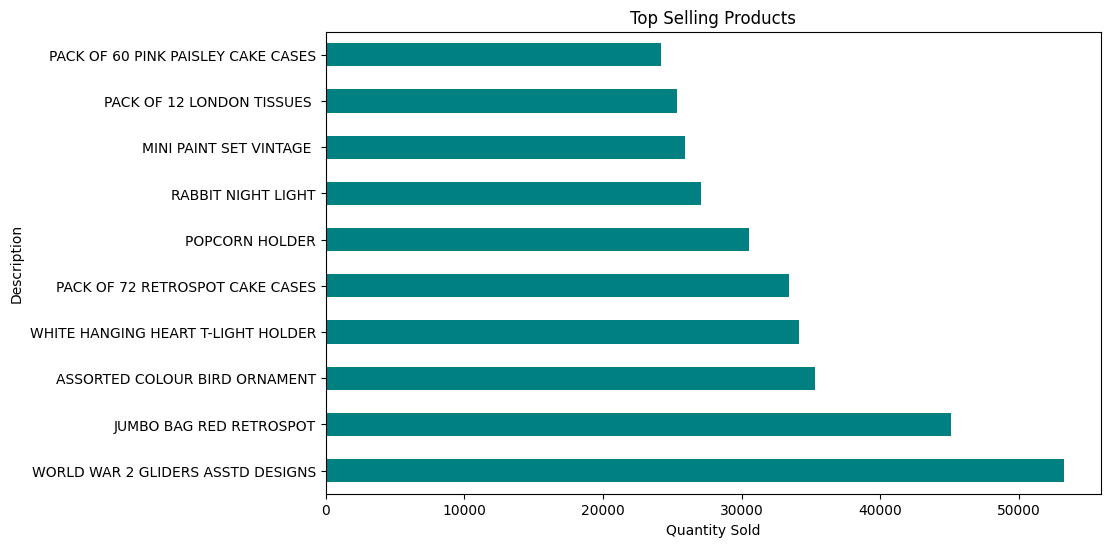

In [6]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products.plot(kind='barh', title='Top Selling Products', color='teal')
plt.xlabel('Quantity Sold')
plt.show()

### 3. Customer Segmentation by Country

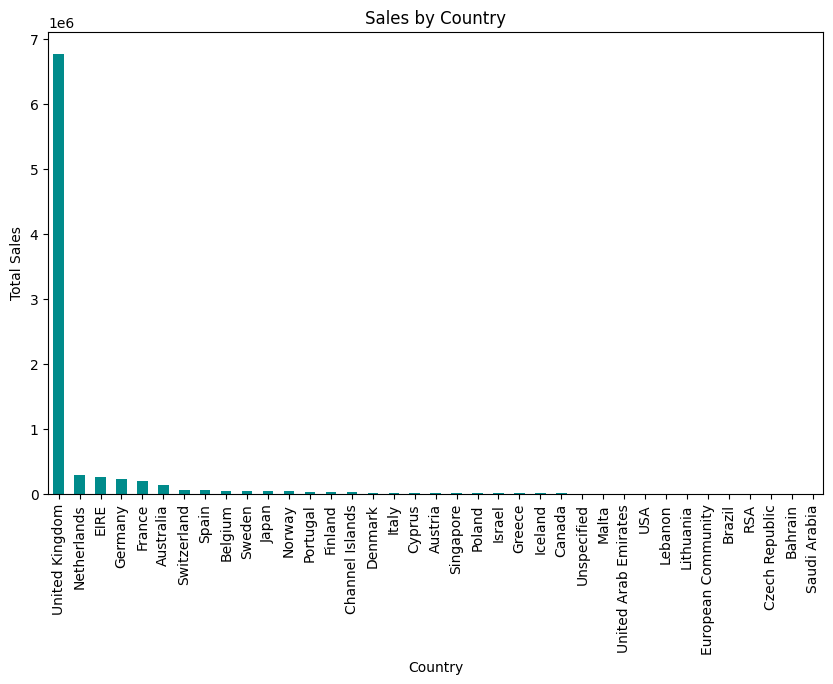

In [7]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
country_sales.plot(kind='bar', title='Sales by Country', color='darkcyan')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

 ## 4. Average Order Value

In [8]:
avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
print("Average Order Value:", avg_order_value)

Average Order Value: 374.0453273546642


 ## Step 5: Clustering for Customer Segmentation

### 1. Creating RFM (Recency, Frequency, Monetary) table

In [9]:
latest_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

### 2. Scaling RFM data

In [10]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

### 3. Applying KMeans clustering

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

### 4. Silhouette Score to evaluate clustering

In [12]:
score = silhouette_score(rfm_scaled, kmeans.labels_)
print("Silhouette Score for Clustering:", score)

Silhouette Score for Clustering: 0.6002528200723999


### 5. Visualizing Clusters

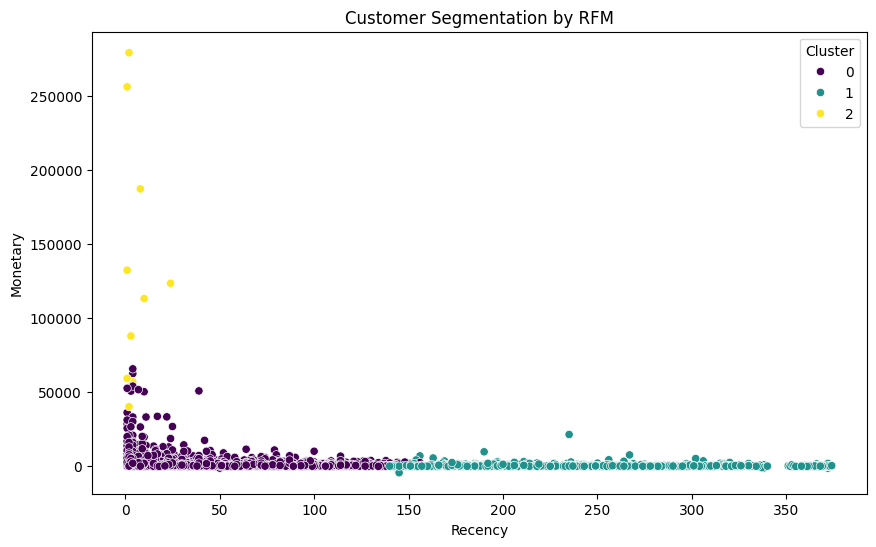

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis')
plt.title("Customer Segmentation by RFM")
plt.show()

## Conclusion
This analysis successfully segments e-commerce customers into meaningful clusters, providing valuable insights into purchasing behaviors. By distinguishing customer groups based on factors like purchase frequency, spending habits, and product preferences, businesses can develop targeted marketing strategies and personalized experiences to enhance customer loyalty and drive growth. Future work could involve applying additional machine learning techniques, such as supervised learning models, to predict customer segments or using deep learning approaches for more complex segment identification. This segmentation model serves as a foundational tool to support data-driven decision-making in e-commerce.
